In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pytz
import sklearn
import scipy

In [2]:
#check versions of packages
import sys
print(sys.version)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn:', sns.__version__)
print('re version:', re.__version__)
print('pytz version:', pytz.__version__)
print('sklearn version:', sklearn.__version__)
print('scipy version:', scipy.__version__)

3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.2.1
numpy version: 1.26.4
seaborn: 0.12.2
re version: 2.2.1
pytz version: 2023.3.post1
sklearn version: 1.2.2
scipy version: 1.11.4


In [3]:
data = pd.read_csv('CPS.csv')

In [4]:
# Select and rename relevant columns for analysis out of the 356 original columns 
selected_columns = {
    # Household Information
    'hrhhid2': 'household_id',
    'HUFINAL': 'interview_outcome',
    'hrnumhou': 'household_members',  # Number of members in a household
    'hefaminc' : 'family_income',

    # Education and Certification Details
    'peschlvl': 'highest_level_of_school',  # Highest level of school 
    'peeduca': 'education_level',  # Highest level of education completed
    'peedegr': 'highest_degree_earned',  # Highest degree earned
    'petrain': 'received_job_training',  # Received job training past high school
    'pecert1': 'professional_certification1',  # Professional certification 1
    'pecert2': 'cert_issued_by_state_or_gov',  # Is certificate issued by the state or the federal government?
    'pecert3': 'is_cert_required',  # Is certification needed for the job?

    # Employment and Income Details
    'pemlr': 'employment_status',  # Employment status
    'prunedor': 'duration_of_unemployment',  # Duration of unemployment
    'hefaminc': 'family_income',  # Family income
    'primind1': 'primary_industry_code_job1',  # Primary industry code for job 1
    'peio1icd': 'industry_code_job1',  # Industry code for job 1
    'ptio1ocd': 'occupation_code_job1',  # Occupation code for job 1
    'primind2': 'primary_industry_code_job2',  # Primary industry code for job 2
    'peio2icd': 'industry_code_job2',  # Industry code for job 2
    'ptio2ocd': 'occupation_code_job2',  # Occupation code for job 2
    'puwk': 'did_work_last_week',  # Did the individual work last week
    
    # Earnings
    'peernper': 'periodicity', # Pay frequency 
    'peernhry': 'hourly_status',  # Hourly earnings status
    'pternh1c': 'earnings_first_job',  # Earnings from the first job
    'pthr': 'total_hours_worked',  # Total hours worked
    'pternwa': 'weekly_earnings',  # Weekly earnings

    # Demographic Variables
    'ptdtrace': 'race',  # Race
    'pesex': 'gender',  # Gender
    'prcitshp': 'citizenship_status',  # Citizenship status

     # Geographic Information
    'gestfips': 'state_code',  # State FIPS code
    

     # Work Arrangement and Preferences
    'pehruslt': 'usual_hours_worked',  # Usual hours worked per week
    'pewa': 'work_at_home',  # Ability or frequency of working from home
    'pewm': 'work_multiple_jobs',  # Working multiple jobs
    
   
     # Job Search and Unemployment Details
    'pruntype': 'reason_for_unemployment',  # Reason for unemployment
    'pulaydtx': 'weeks_looking_for_work',  # Weeks spent looking for work
    'pulkm1': 'primary_method_of_job_search',  # Primary method of job search
    'puhrck12': 'job_search_method',  # Job search method

     # Health and Disability
    'pedisabl': 'disability_status',  # Disability status
    'pehspnon': 'health_status_impacting_work',  # Health status impacting work
    
}

# Preliminary Analysis

In [5]:
# Filter the dataset to keep only the selected columns, verifying they exist
data_filtered = data[[col for col in selected_columns if col in data.columns]].rename(columns=selected_columns)

In [6]:
# Replace -1 with NaN in specific columns where -1 signifies missing data
columns_to_replace = ['highest_level_of_school', 'education_level', 'professional_certification1',
                      'cert_issued_by_state_or_gov', 'is_cert_required', 'employment_status',
                      'usual_hours_worked', 'reason_for_unemployment', 'health_status_impacting_work', 'weekly_earnings']
for column in columns_to_replace:
     data_filtered[column] = data_filtered[column].replace(-1, np.nan)


In [7]:
# Ensure categorical data is correctly typed
categorical_columns = ['employment_status', 'professional_certification1', 'race', 'gender', 'citizenship_status', 'primary_industry_code_job1']
for col in categorical_columns:
    data_filtered[col] = data_filtered[col].astype('category')

## Family Income distribution analysis

In [8]:
data_filtered['family_income'].describe()

count    126784.000000
mean          9.541748
std           6.414309
min          -1.000000
25%           4.000000
50%          12.000000
75%          15.000000
max          16.000000
Name: family_income, dtype: float64

In [9]:
df_income = data_filtered[data_filtered['family_income'] != -1]

In [10]:
df_income['family_income'].describe()

count    99250.000000
mean        12.466247
std          3.629749
min          1.000000
25%         11.000000
50%         14.000000
75%         15.000000
max         16.000000
Name: family_income, dtype: float64

### Histogram of family income categories distributiuon

In [11]:
# Define labels for categories
category_labels = [
    "LESS THAN $5,000",
    "5,000 TO 7,499",
    "7,500 TO 9,999",
    "10,000 TO 12,499",
    "12,500 TO 14,999",
    "15,000 TO 19,999",
    "20,000 TO 24,999",
    "25,000 TO 29,999",
    "30,000 TO 34,999",
    "35,000 TO 39,999",
    "40,000 TO 49,999",
    "50,000 TO 59,999",
    "60,000 TO 74,999",
    "75,000 TO 99,999",
    "100,000 TO 149,999",
    "150,000 OR MORE"
]

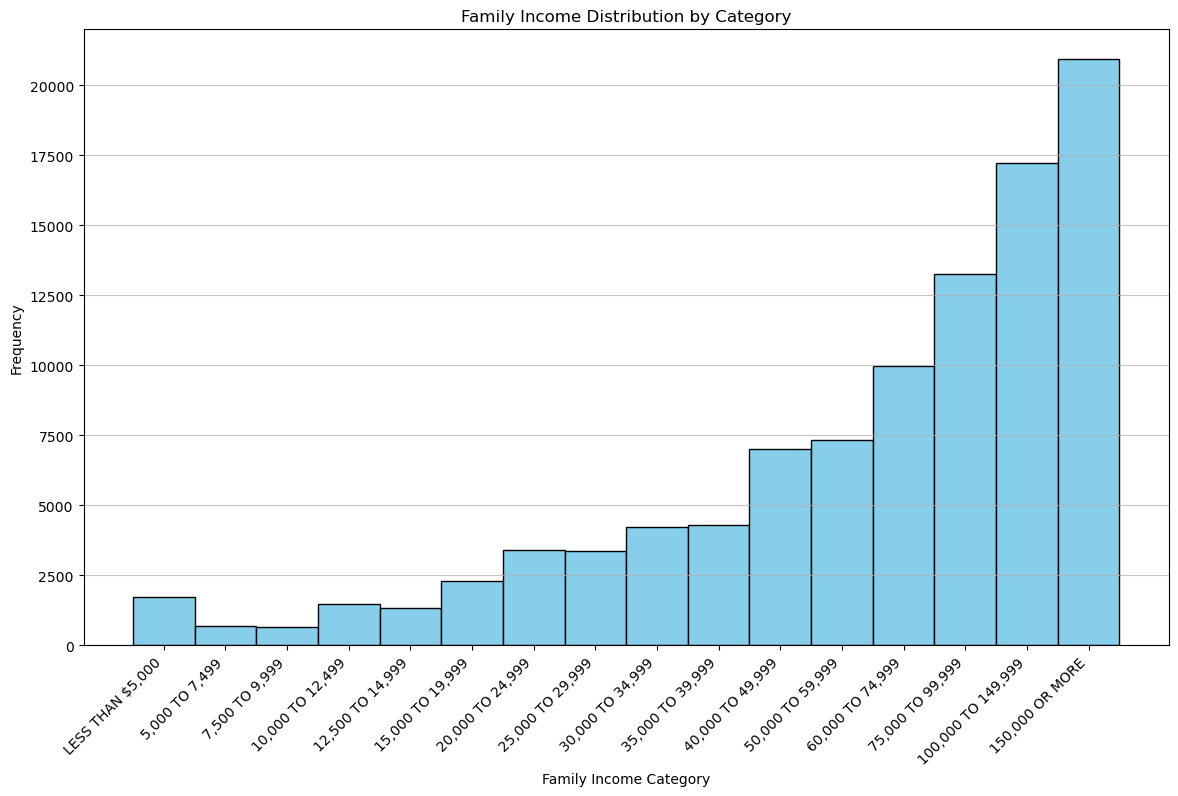

In [12]:
# Create a histogram for income distribution using generated labels
plt.figure(figsize=(14, 8))  # Sets the figure size for better readability
plt.hist(df_income['family_income'], bins=range(1, 18), align='left', color='skyblue', edgecolor='black')
plt.title('Family Income Distribution by Category')
plt.xlabel('Family Income Category')
plt.ylabel('Frequency')
plt.xticks(range(1, 17), category_labels, rotation=45, ha='right')  # Set custom labels and rotate them for better visibility
plt.grid(axis='y', alpha=0.75)

plt.show()

## Hourly earnings distribution analysis                

In [13]:
data_filtered['weekly_earnings'].describe()

count     10246.000000
mean     131428.596721
std      119913.265524
min           0.000000
25%       64600.000000
50%      100000.000000
75%      163461.000000
max      867201.000000
Name: weekly_earnings, dtype: float64

In [14]:
weekly_earn_df = data_filtered[data_filtered['weekly_earnings'] != -1]

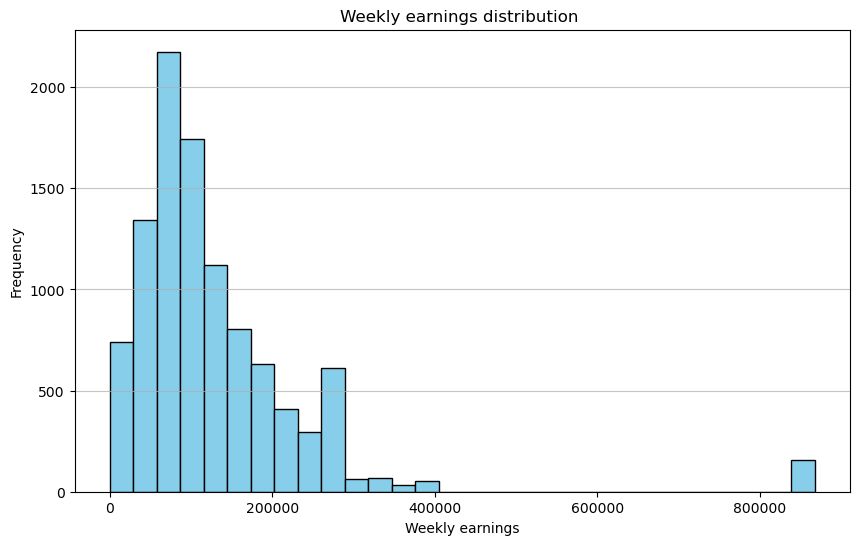

In [15]:
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.hist(weekly_earn_df['weekly_earnings'], bins=30, color='skyblue', edgecolor='black')  # Plots the histogram
plt.title('Weekly earnings distribution ')  # Adds a title to the histogram
plt.xlabel('Weekly earnings')  # Adds a label to the x-axis
plt.ylabel('Frequency')  # Adds a label to the y-axis
plt.grid(axis='y', alpha=0.75)  # Adds a grid, only horizontally, with some transparency

plt.show()  # Displays the histogram

# Visualization

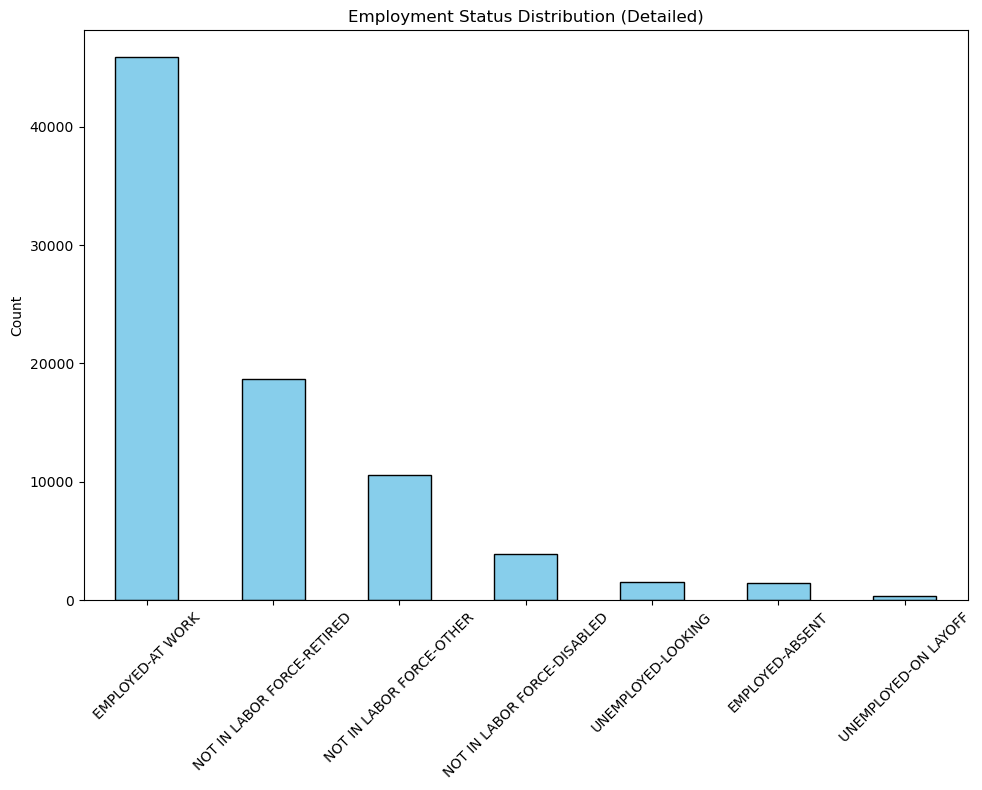

In [16]:
# Given employment labels for direct mapping from the codes to their descriptions
employment_labels = [
    'EMPLOYED-AT WORK',
    'EMPLOYED-ABSENT',
    'UNEMPLOYED-ON LAYOFF',
    'UNEMPLOYED-LOOKING',
    'NOT IN LABOR FORCE-RETIRED',
    'NOT IN LABOR FORCE-DISABLED',
    'NOT IN LABOR FORCE-OTHER'
]

# Mapping from employment status codes to their descriptions
employment_status_descriptions = {i+1: label for i, label in enumerate(employment_labels)}

# Applying the mapping to the 'employment_status' column
data_filtered['Employment_Status_Description'] = data_filtered['employment_status'].map(employment_status_descriptions)

# Counting occurrences for each employment status description
employment_status_description_counts = data_filtered['Employment_Status_Description'].value_counts()

# Creating a bar plot for employment status descriptions before aggregation
plt.figure(figsize=(10, 8))
employment_status_description_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Employment Status Distribution (Detailed)')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


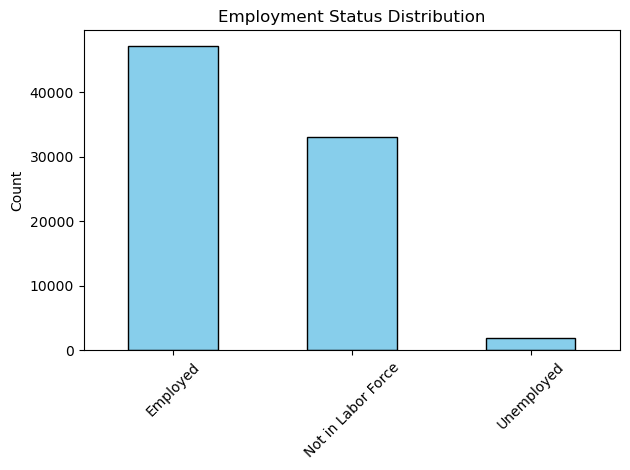

In [17]:
# Grouping data based on the 'employment_status' column and aggregating counts for each status
employment_status_counts = data_filtered['employment_status'].value_counts().sort_index()

# Mapping codes to human-readable categories based on the provided information
employment_status_mapping = {
    1: 'Employed',
    2: 'Employed',
    3: 'Unemployed',
    4: 'Unemployed',
    5: 'Not in Labor Force',
    6: 'Not in Labor Force',
    7: 'Not in Labor Force'
}

# Applying the mapping to aggregate counts under "Employed", "Unemployed", and "Not in Labor Force" categories
employment_status_aggregated = employment_status_counts.rename(index=employment_status_mapping).groupby(level=0).sum()

# Visualization

# Creating a bar plot
employment_status_aggregated.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Employment Status Distribution')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Showing the plot
plt.tight_layout()
plt.show()


PEEDUCA			2		HIGHEST LEVEL OF SCHOOL 								137 - 138
					COMPLETED OR DEGREE RECEIVED 

					EDITED UNIVERSE:	PRPERTYP = 2 0R 3				

					VALID ENTRIES

					31	LESS THAN 1ST GRADE
					32	1ST, 2ND, 3RD OR 4TH GRADE
					33	5TH OR 6TH GRADE
					34	7TH OR 8TH GRADE
					35	9TH GRADE
					36	10TH GRADE
					37	11TH GRADE
					38	12TH GRADE NO DIPLOMA
					39	HIGH SCHOOL GRAD-DIPLOMA OR EQUIV (GED)
					40	SOME COLLEGE BUT NO DEGREE
					41	ASSOCIATE DEGREE-OCCUPATIONAL/VOCATIONAL
					42	ASSOCIATE DEGREE-ACADEMIC PROGRAM
					43	BACHELOR'S DEGREE (EX: BA, AB, BS)
					44	MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)
					45	PROFESSIONAL SCHOOL DEG (EX: MD, DDS, DVM)
					46	DOCTORATE DEGREE (EX: PhD, EdD)


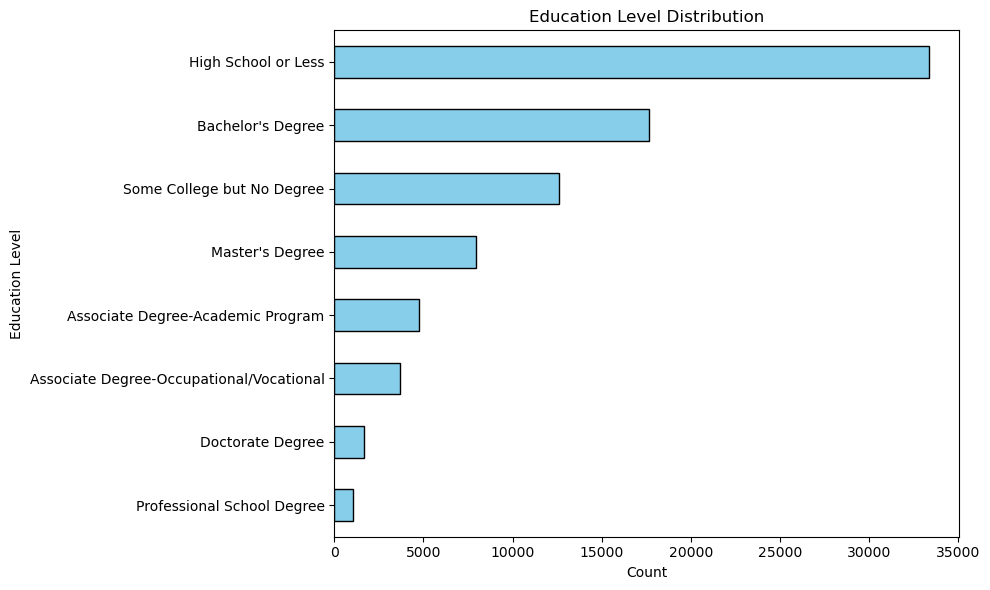

In [18]:
# Mapping the education levels to more generalized groups for clarity and aggregation
education_mapping = {
    31: 'High School or Less',
    32: 'High School or Less',
    33: 'High School or Less',
    34: 'High School or Less',
    35: 'High School or Less',
    36: 'High School or Less',
    37: 'High School or Less',
    38: 'High School or Less',
    39: 'High School or Less',
    40: 'Some College but No Degree',
    41: 'Associate Degree-Occupational/Vocational',
    42: 'Associate Degree-Academic Program',
    43: "Bachelor's Degree",
    44: "Master's Degree",
    45: 'Professional School Degree',
    46: 'Doctorate Degree'
}

# Applying the mapping to the 'education_level' column to create a new column for the aggregated groups
data_filtered['Education_Level_Grouped'] = data_filtered['education_level'].map(education_mapping)

# Counting the number of occurrences in each education level group
education_level_counts = data_filtered['Education_Level_Grouped'].value_counts().sort_values()

# Creating a bar plot for the aggregated education levels
plt.figure(figsize=(10, 6))
education_level_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()


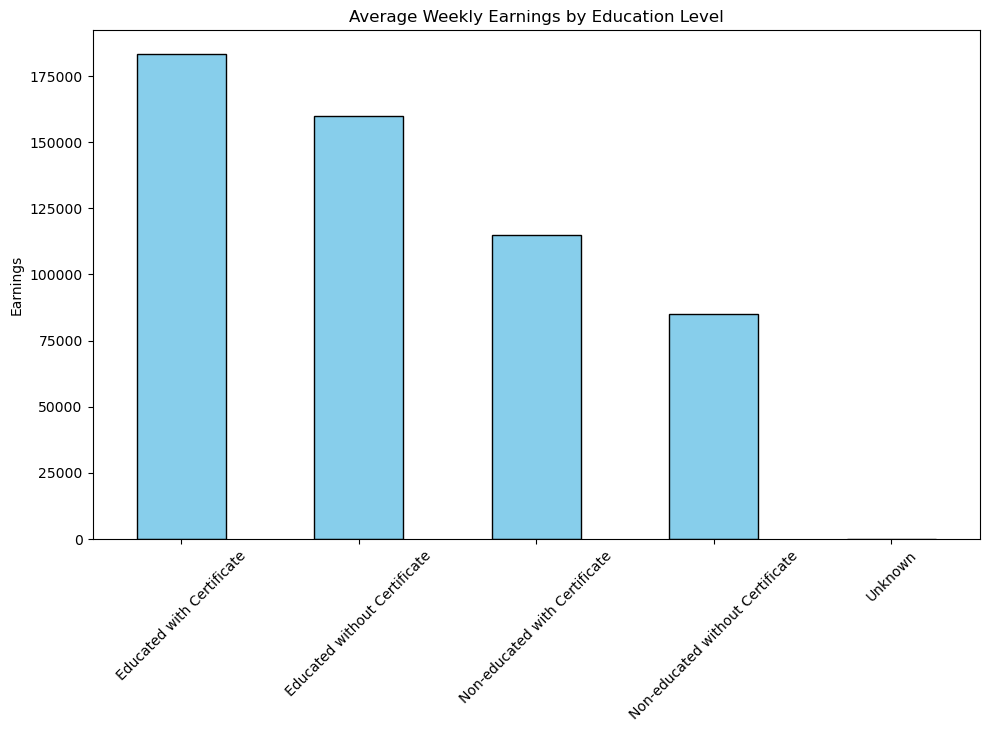

In [19]:
# Visualization 4: Distribution of income by Education Level
education_threshold = 41  # Threshold for considering someone as educated
certificate_col = 'professional_certification1'  

# Ensure 'education_level' and 'professional_certification1' are in a suitable format
data_filtered['education_level_numeric'] = pd.to_numeric(data_filtered['education_level'], errors='coerce')

# Define the four groups
conditions = [
    (data_filtered['education_level_numeric'] < education_threshold) & (data_filtered[certificate_col] == 1),
    (data_filtered['education_level_numeric'] < education_threshold) & (data_filtered[certificate_col] != 1),
    (data_filtered['education_level_numeric'] >= education_threshold) & (data_filtered[certificate_col] == 1),
    (data_filtered['education_level_numeric'] >= education_threshold) & (data_filtered[certificate_col] != 1)
]

choices = [
    'Non-educated with Certificate',
    'Non-educated without Certificate',
    'Educated with Certificate',
    'Educated without Certificate'
]

data_filtered['Education_Certificate_Group'] = np.select(conditions, choices, default='Unknown')

# Calculate average weekly earnings for each group
grouped_earnings = data_filtered.groupby('Education_Certificate_Group')['weekly_earnings'].mean()
grouped_earnings = grouped_earnings.drop(columns=['Unknown'])

# Plotting
plt.figure(figsize=(10, 8))
grouped_earnings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Weekly Earnings by Education Level')
plt.ylabel('Earnings')
plt.xlabel('')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()




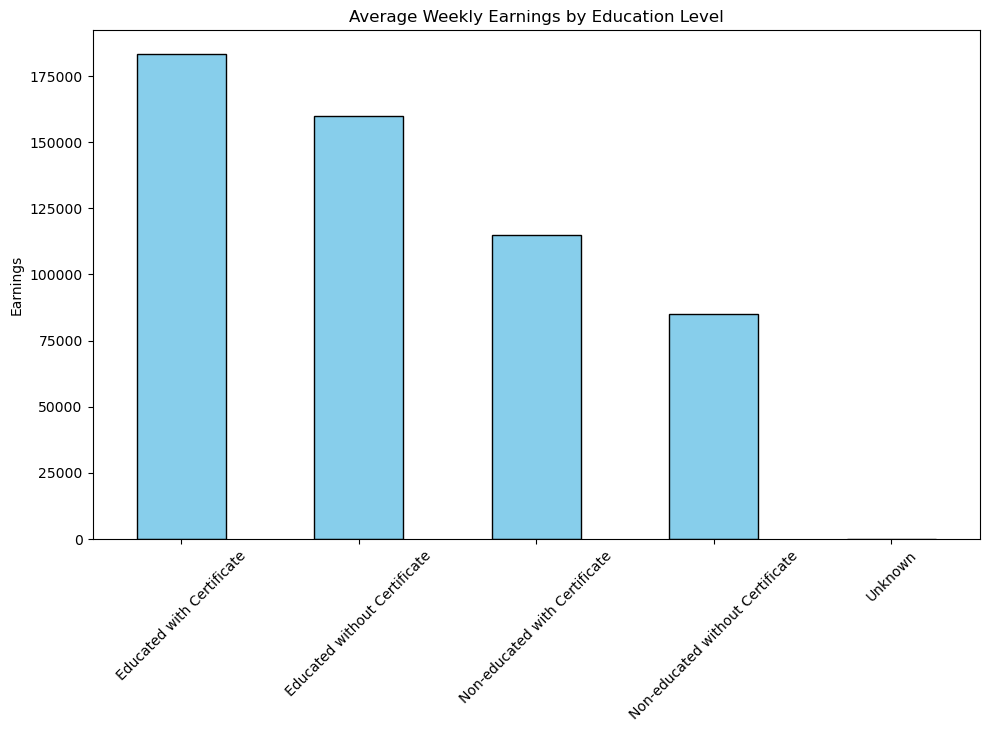

In [20]:
# Plotting
plt.figure(figsize=(10, 8))
grouped_earnings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Weekly Earnings by Education Level')
plt.ylabel('Earnings')
plt.xlabel('')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

C:\Users\almas\AppData\Local\Temp\ipykernel_9048\1295738076.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employment_distribution = df_employment_education.groupby(['Education_Certificate_Group', 'Employment_Status_Description']).size().unstack(fill_value=0)


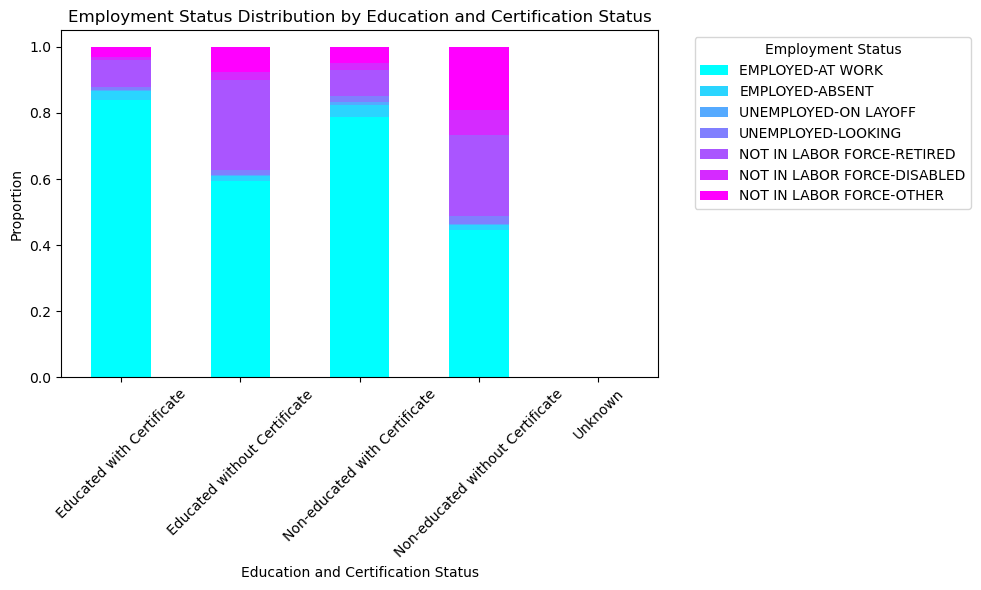

In [21]:
# Creating a new dataframe with just the necessary columns
df_employment_education = data_filtered[['Education_Certificate_Group', 'Employment_Status_Description']]

# Getting counts of each employment status within each education group
employment_distribution = df_employment_education.groupby(['Education_Certificate_Group', 'Employment_Status_Description']).size().unstack(fill_value=0)

# Normalizing the counts to get proportions
employment_proportions = employment_distribution.div(employment_distribution.sum(axis=1), axis=0)

# Plotting the proportions as a stacked bar chart
employment_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='cool')
plt.title('Employment Status Distribution by Education and Certification Status')
plt.xlabel('Education and Certification Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

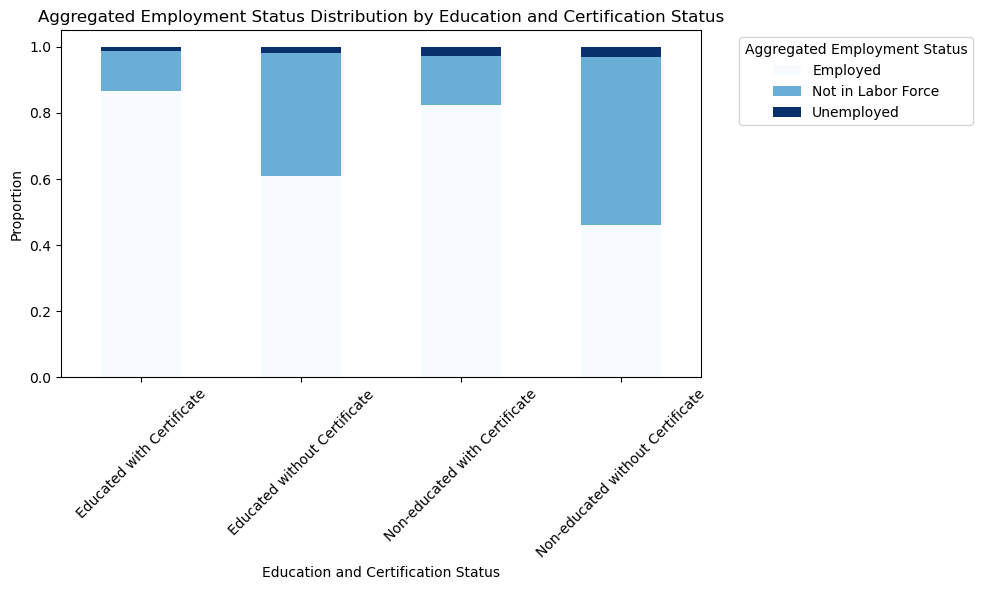

In [22]:
# For this approach, we simulate the aggregation based on the 'Employment_Status_Description' column
# and the education/certification groups we've already defined in 'Education_Certificate_Group'

# Mapping from detailed to aggregated employment statuses
employment_status_to_aggregated = {
    'EMPLOYED-AT WORK': 'Employed',
    'EMPLOYED-ABSENT': 'Employed',
    'UNEMPLOYED-ON LAYOFF': 'Unemployed',
    'UNEMPLOYED-LOOKING': 'Unemployed',
    'NOT IN LABOR FORCE-RETIRED': 'Not in Labor Force',
    'NOT IN LABOR FORCE-DISABLED': 'Not in Labor Force',
    'NOT IN LABOR FORCE-OTHER': 'Not in Labor Force'
}

# Applying the mapping to aggregate employment status descriptions
data_filtered['Aggregated_Employment_Status'] = data_filtered['Employment_Status_Description'].map(employment_status_to_aggregated)

# Calculating the distribution of aggregated employment statuses within each education group
agg_employment_distribution = data_filtered.groupby(['Education_Certificate_Group', 'Aggregated_Employment_Status']).size().unstack(fill_value=0)

# Normalizing the counts to get proportions
agg_employment_proportions = agg_employment_distribution.div(agg_employment_distribution.sum(axis=1), axis=0)

# Plotting the proportions as a stacked bar chart for aggregated employment status
agg_employment_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')
plt.title('Aggregated Employment Status Distribution by Education and Certification Status')
plt.xlabel('Education and Certification Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Aggregated Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


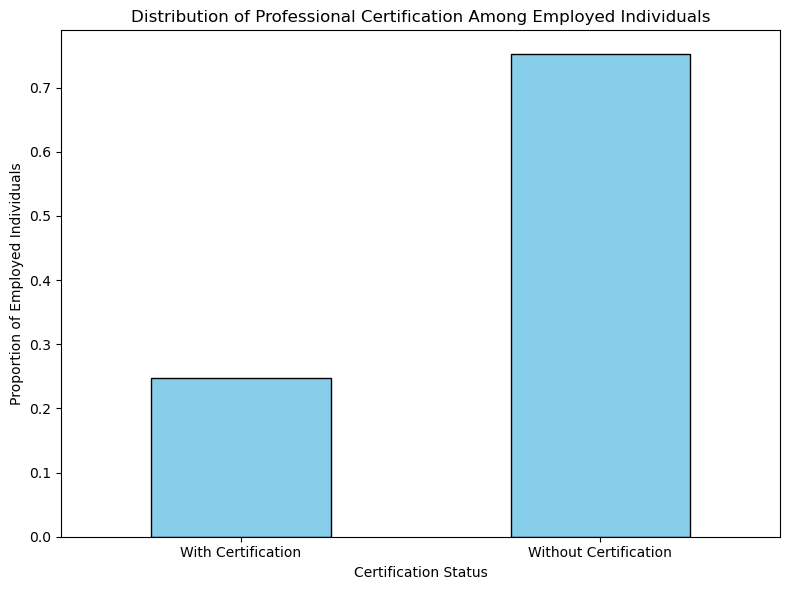

In [23]:
# Filtering the dataframe for employed individuals based on 'employment_status' == 1.0
employed_data = data_filtered[data_filtered['employment_status'] == 1.0]

# Distribution of professional certification among employed individuals
# Assuming 'professional_certification1' == 1.0 indicates holding a professional certification
certification_counts = employed_data['professional_certification1'].value_counts(normalize=True).sort_index()

# Mapping certification status for clarity
certification_mapping = {1.0: 'With Certification', 2.0: 'Without Certification'}
certification_counts.index = certification_counts.index.map(certification_mapping)

# Plotting
certification_counts.plot(kind='bar', figsize=(8, 6), color='skyblue', edgecolor='black')
plt.title('Distribution of Professional Certification Among Employed Individuals')
plt.xlabel('Certification Status')
plt.ylabel('Proportion of Employed Individuals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\almas\AppData\Local\Temp\ipykernel_9048\2402242009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earnings_data['Certification_Status'] = earnings_data['professional_certification1'].map({1: 'With Certification', 2: 'Without Certification'})


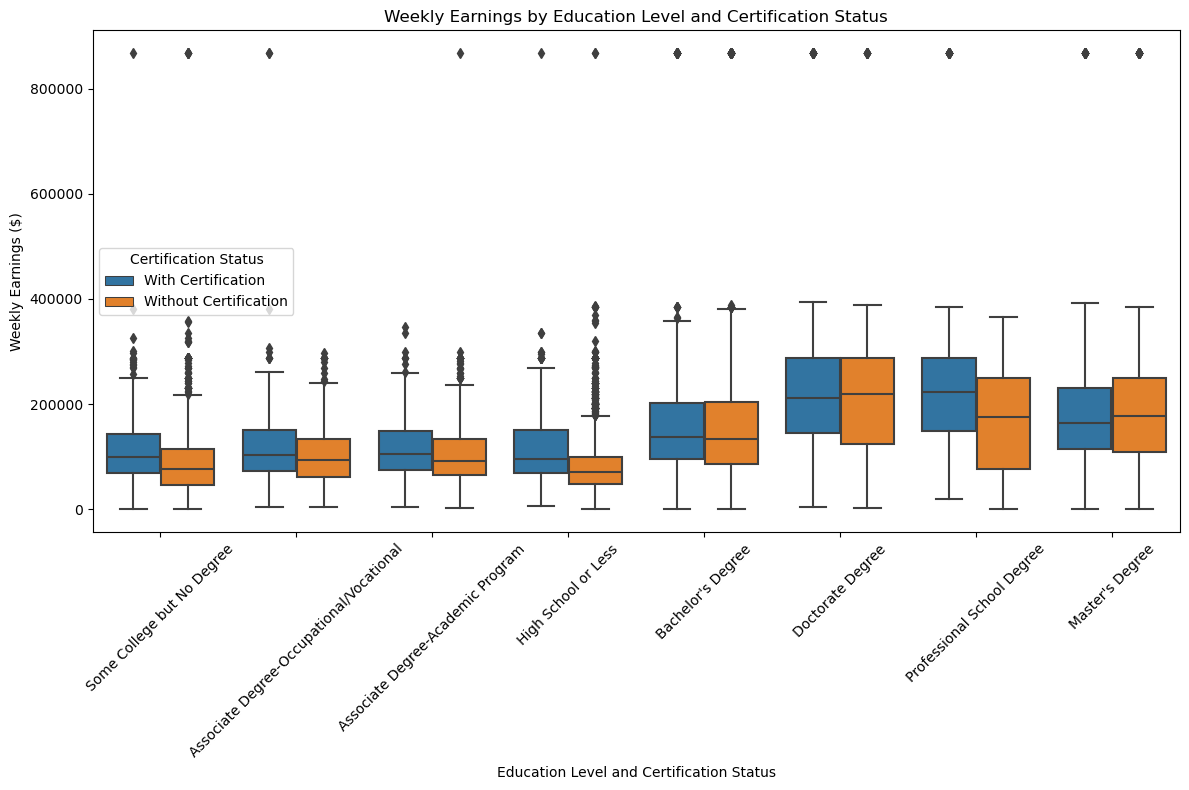

In [24]:
#Preparing the data: Filtering out negative earnings as they may represent missing or placeholder values
earnings_data = data_filtered[data_filtered['weekly_earnings'] > 0]

# Mapping certification status for readability
earnings_data['Certification_Status'] = earnings_data['professional_certification1'].map({1: 'With Certification', 2: 'Without Certification'})

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=earnings_data, x='Education_Level_Grouped', y='weekly_earnings', hue='Certification_Status')
plt.title('Weekly Earnings by Education Level and Certification Status')
plt.xticks(rotation=45)
plt.ylabel('Weekly Earnings ($)')
plt.xlabel('Education Level and Certification Status')
plt.legend(title='Certification Status')
plt.tight_layout()

# Show the plot
plt.show()

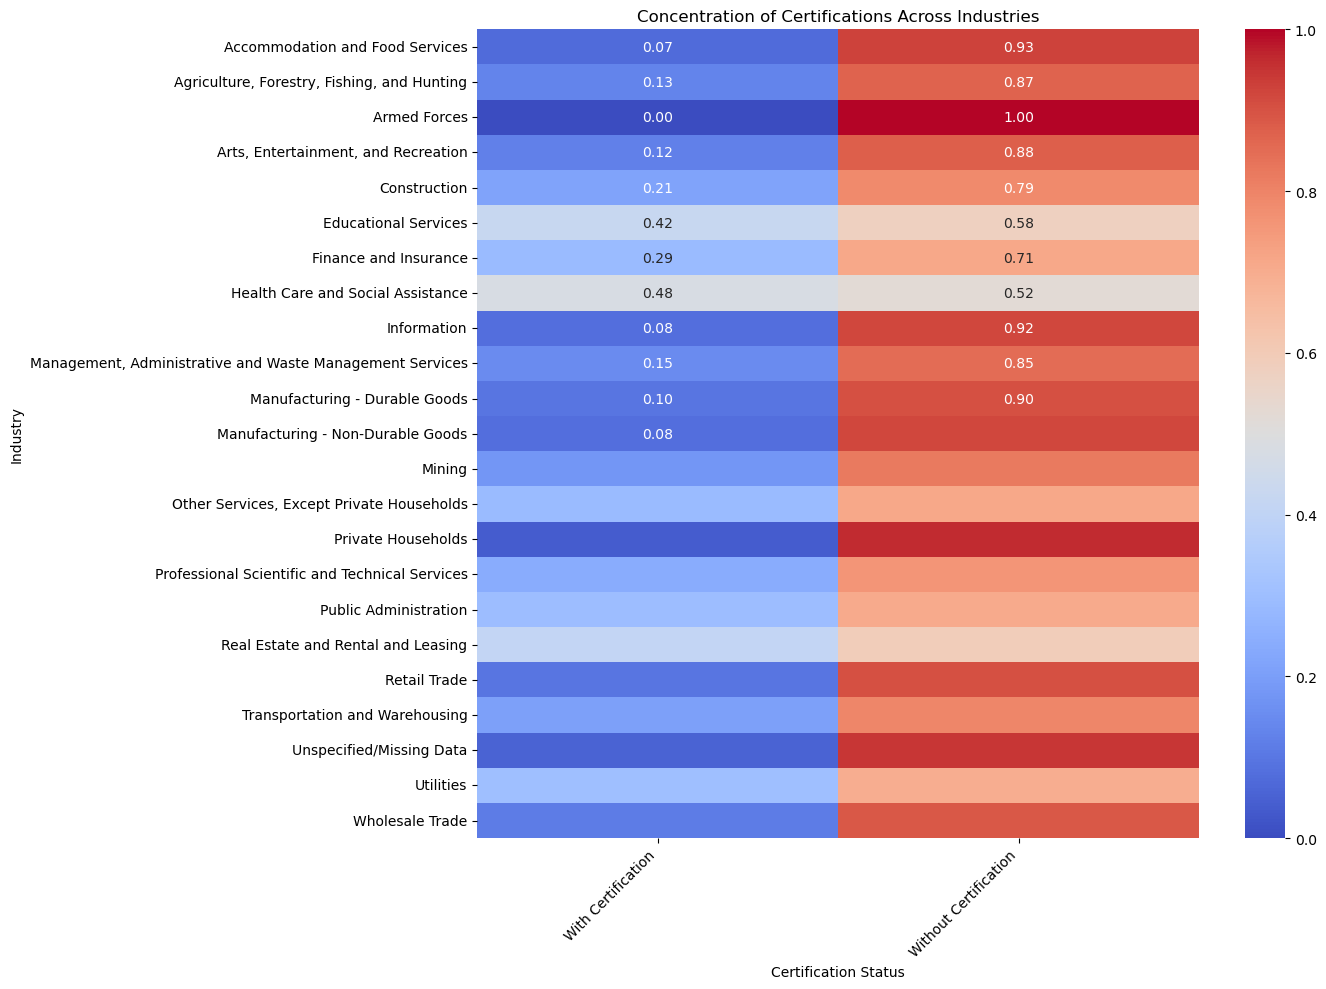

In [25]:
# Mapping industries from the provided list to more readable names
industry_mapping = {
    1: 'Agriculture, Forestry, Fishing, and Hunting',
    2: 'Mining',
    3: 'Construction',
    4: 'Manufacturing - Durable Goods',
    5: 'Manufacturing - Non-Durable Goods',
    6: 'Wholesale Trade',
    7: 'Retail Trade',
    8: 'Transportation and Warehousing',
    9: 'Utilities',
    10: 'Information',
    11: 'Finance and Insurance',
    12: 'Real Estate and Rental and Leasing',
    13: 'Professional Scientific and Technical Services',
    14: 'Management, Administrative and Waste Management Services',
    15: 'Educational Services',
    16: 'Health Care and Social Assistance',
    17: 'Arts, Entertainment, and Recreation',
    18: 'Accommodation and Food Services',
    19: 'Private Households',
    20: 'Other Services, Except Private Households',
    21: 'Public Administration',
    22: 'Armed Forces',
      -1: 'Unspecified/Missing Data',
    np.nan: 'Unspecified/Missing Data'  # This will handle NaN values during the mapping process
}

# Mapping certification status for readability
data_filtered['Certification_Status'] = data_filtered['professional_certification1'].map({1: 'With Certification', 2: 'Without Certification'})

# Applying the industry mapping
data_filtered['Industry'] = data_filtered['primary_industry_code_job1'].map(industry_mapping)

# Calculating the count of certified vs. non-certified individuals within each industry
certification_industry_distribution = pd.crosstab(data_filtered['Industry'], data_filtered['Certification_Status'], normalize='index')

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(certification_industry_distribution, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Concentration of Certifications Across Industries')
plt.ylabel('Industry')
plt.xlabel('Certification Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
# Compute IQR to identify outliers
Q1 = data_filtered['weekly_earnings'].quantile(0.25)
Q3 = data_filtered['weekly_earnings'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_filtered[(data_filtered['weekly_earnings'] < lower_bound) | (data_filtered['weekly_earnings'] > upper_bound)]
outliers_count = outliers.shape[0]

lower_bound, upper_bound, outliers_count

(-83691.5, 311752.5, 310)

In [27]:
data_filtered

,household_id,interview_outcome,household_members,family_income,highest_level_of_school,education_level,professional_certification1,cert_issued_by_state_or_gov,is_cert_required,employment_status,...,usual_hours_worked,reason_for_unemployment,health_status_impacting_work,Employment_Status_Description,Education_Level_Grouped,education_level_numeric,Education_Certificate_Group,Aggregated_Employment_Status,Certification_Status,Industry
0,15011,201,3,12,NaN,37.0,2.0,NaN,NaN,4.0,...,NaN,2.0,2.0,UNEMPLOYED-LOOKING,High School or Less,37.0,Non-educated without Certificate,Unemployed,Without Certification,Manufacturing - Durable Goods
1,15011,201,3,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,Unknown,NaN,NaN,Unspecified/Missing Data
2,15011,201,3,12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,Unknown,NaN,NaN,Unspecified/Missing Data
3,16011,201,1,13,NaN,40.0,2.0,NaN,NaN,1.0,...,40.0,NaN,2.0,EMPLOYED-AT WORK,Some College but No Degree,40.0,Non-educated without Certificate,Employed,Without Certification,Accommodation and Food Services
4,15011,201,2,16,NaN,40.0,2.0,NaN,NaN,1.0,...,40.0,NaN,2.0,EMPLOYED-AT WORK,Some College but No Degree,40.0,Non-educated without Certificate,Employed,Without Certification,Manufacturing - Durable Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126779,17111,218,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unspecified/Missing Data
126780,15111,218,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unspecified/Missing Data
126781,15111,218,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unspecified/Missing Data
126782,15111,218,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unspecified/Missing Data
